## Kartelio čiuožimas

> **Problema**: Jei Petras nori pabėgti nuo vilko, jis turi judėti greičiau už jį. Pažiūrėsime, kaip Petras gali išmokti čiuožti, ypač išlaikyti pusiausvyrą, naudojant Q-Learning.

Pirmiausia, įdiekime gym ir importuokime reikalingas bibliotekas:


In [1]:
#code block 1

## Sukurkite vežimėlio ir stulpo aplinką


In [ ]:
#code block 2

Norėdami pamatyti, kaip veikia aplinka, paleiskime trumpą simuliaciją 100 žingsnių.


In [ ]:
#code block 3

Simuliacijos metu mums reikia gauti stebėjimus, kad galėtume nuspręsti, kaip elgtis. Iš tiesų, `step` funkcija grąžina mums dabartinius stebėjimus, atlygio funkciją ir `done` vėliavėlę, kuri nurodo, ar verta tęsti simuliaciją, ar ne:


In [ ]:
#code block 4

Mes galime gauti minimalią ir maksimalią tų skaičių vertę:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Ištirkime ir kitą diskretizavimo metodą, naudojant intervalus:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Dabar atlikime trumpą simuliaciją ir stebėkime tuos diskrečius aplinkos vertes.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-Lentelės Struktūra


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


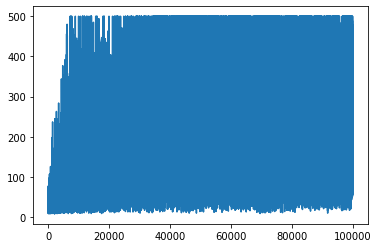

In [20]:
plt.plot(rewards)

Iš šio grafiko negalima nieko pasakyti, nes dėl stochastinio mokymo proceso pobūdžio mokymo sesijų trukmė labai skiriasi. Kad šis grafikas būtų aiškesnis, galime apskaičiuoti **slankųjį vidurkį** per eksperimentų serijas, tarkime, 100. Tai galima patogiai atlikti naudojant `np.convolve`:


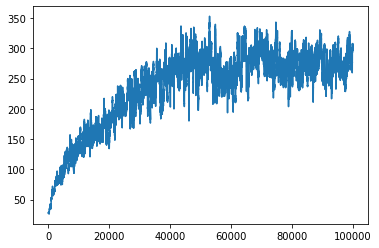

In [22]:
#code block 12

## Kintančių hiperparametrų stebėjimas ir rezultatų peržiūra

Dabar būtų įdomu pamatyti, kaip iš tikrųjų veikia apmokytas modelis. Paleiskime simuliaciją, ir mes laikysimės tos pačios veiksmų pasirinkimo strategijos kaip ir mokymo metu: atranka pagal tikimybių pasiskirstymą Q-lentelėje:


In [23]:
# code block 13

## Rezultato išsaugojimas animuotame GIF

Jei norite nustebinti savo draugus, galite jiems nusiųsti animuotą GIF paveikslėlį su balansavimo stulpu. Tam galime naudoti `env.render`, kad sukurtume vaizdo kadrą, o tada išsaugoti juos kaip animuotą GIF naudojant PIL biblioteką:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Atsakomybės apribojimas**:  
Šis dokumentas buvo išverstas naudojant AI vertimo paslaugą [Co-op Translator](https://github.com/Azure/co-op-translator). Nors siekiame tikslumo, prašome atkreipti dėmesį, kad automatiniai vertimai gali turėti klaidų ar netikslumų. Originalus dokumentas jo gimtąja kalba turėtų būti laikomas autoritetingu šaltiniu. Kritinei informacijai rekomenduojama naudoti profesionalų žmogaus vertimą. Mes neprisiimame atsakomybės už nesusipratimus ar klaidingus interpretavimus, atsiradusius dėl šio vertimo naudojimo.
